## Contents
#### 1. Importing libraries and cleaned data
#### 2. The elbow technique
#### 3. K-means clustering
#### 4. Plot clusters
#### 5. Descriptive statistics

### 1. Importing libraries and cleaned data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Documents\Career Foundry\Immersion Final\Prison Comparisons\02 Data\Prepped Data'

In [5]:
df = pd.read_csv(os.path.join(path, 'cleaned_for_k_means.csv'), index_col = 0)

In [6]:
df.shape

(91031, 10)

### 2. The elbow technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [10]:
score

[-1.8004735902059374e+16,
 -8594327888263867.0,
 -3822321535533833.5,
 -2251705502191463.8,
 -1502824230741557.2,
 -1049898273713323.5,
 -826563407382070.6,
 -650518483910448.4,
 -553768560233822.94]

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I tried both 3 & 4 because there is flattening of the line at both numbers but neither made a lot of sense to me in the scatterplots.  Going with 3 for now.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

year  total_pop  total_pop_15to64  female_pop_15to64  male_pop_15to64  \
20  1990      34353             22729              11648            11081   
21  1991      35010             23123              11856            11267   
22  1992      35985             23790              12191            11599   
23  1993      36953             24392              12493            11899   
24  1994      38186             25232              12927            12305   

    aapi_pop_15to64  black_pop_15to64  latinx_pop_15to64  native_pop_15to64  \
20             96.0            4103.0              134.0               47.0   
21            102.0            4115.0              154.0               53.0   
22            111.0            4204.0              169.0               60.0   
23            120.0            4283.0              179.0               66.0   
24            126.0            4396.0              206.0               73.0   

    white_pop_15to64  clusters  
20           18349.0         0  
21           18699.0         0  
22           19246.0         0  
23           19744.0         0  
24           20431.0         0

In [16]:
df['clusters'].value_counts(dropna = False)

0    87898
2     3033
1      100
Name: clusters, dtype: int64

### 4. Plot clusters

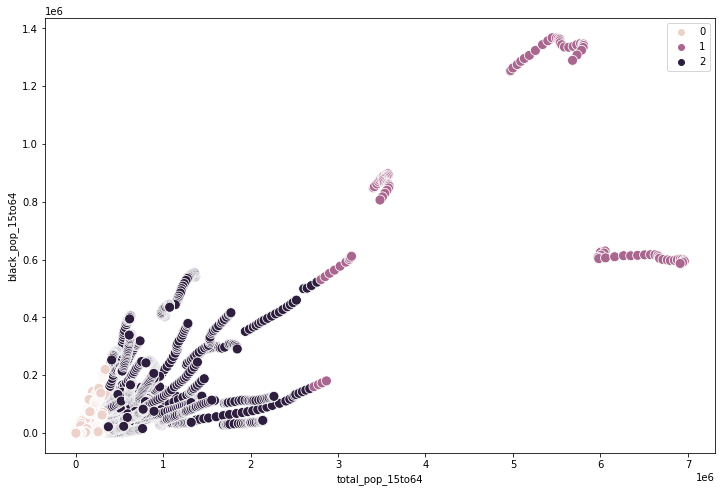

In [17]:
# Plot the clusters for the "total_pop_15to64" and "black_pop_15to64" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_pop_15to64'], y=df['black_pop_15to64'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_pop_15to64') # Label x-axis.
plt.ylabel('black_pop_15to64') # Label y-axis.
plt.show()

According to the heat map made in 6.2 there is high correlation between total population 15-64 and black population 15-64.  However, in the regression fit in 6.4, there didn't seem to be a good fit.  This is the same shape but I don't see anything significant in the clustering. There is still a positive correlation with a good amount of variation.  In the middle-purple group both populations increase sharply around 5 for total_pop and 1.4 for black_pop so there seems to be a section where black_pop is higher in regards to total_pop.  Then, in that same group, while total_pop rises, black_pop drops about 1/2 way.

In [18]:
import gc

In [35]:
gc.collect()

3713

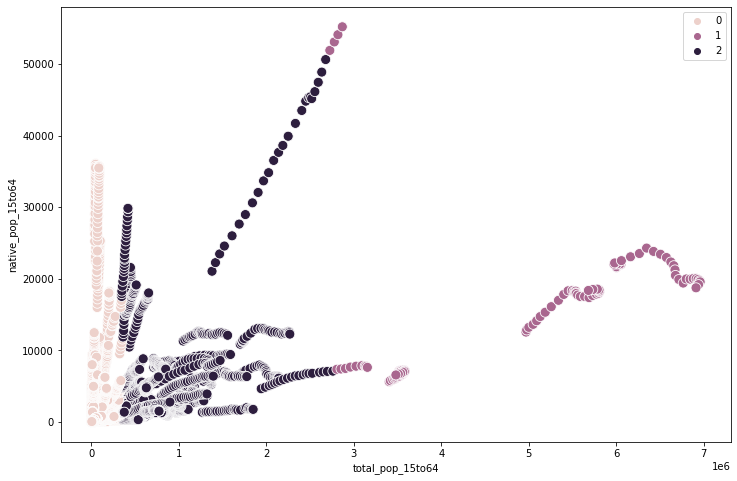

In [20]:
# Plot "total_pop_15to64" and "native_pop_15to64" because they have a
# lower correlation and the comparison might help to shed some light

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_pop_15to64'], y=df['native_pop_15to64'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_pop_15to64') # Label x-axis.
plt.ylabel('native_pop_15to64') # Label y-axis.
plt.show()

The Native American population jumps up very high compared to the total population and then drops very low and then rises to less than 1/2 the total population.  I don't understand what the clusters add to it.

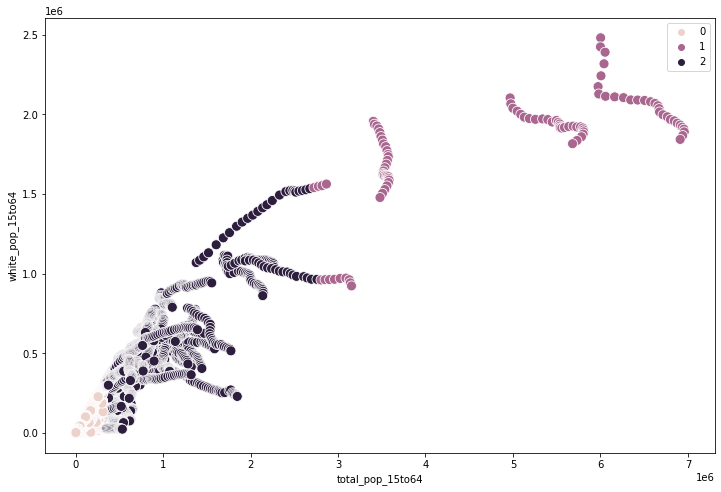

In [36]:
# Plot "total_pop_15to64" and "white_pop_15to64" because they have a
# lower correlation and the comparison might help to shed some light

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_pop_15to64'], y=df['white_pop_15to64'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_pop_15to64') # Label x-axis.
plt.ylabel('white_pop_15to64') # Label y-axis.
plt.show()

The total_pop vs white_pop looks similar to the tot_pop vs the black_pop though there's less variation in this white graph.

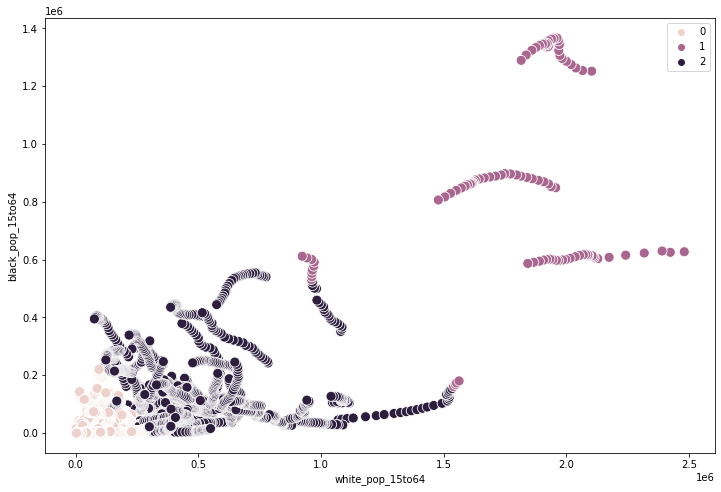

In [37]:
# Plot "white_pop_15to64" and "black_pop_15to64" because they have a
# lower correlation and the comparison might help to shed some light

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['white_pop_15to64'], y=df['black_pop_15to64'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('white_pop_15to64') # Label x-axis.
plt.ylabel('black_pop_15to64') # Label y-axis.
plt.show()

There is more variation in the white_pop vs black_pop, even though the same general shape and clustering is present.

### 5. Descriptive statistics

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'medium purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'light purple'

In [22]:
dfg = df.groupby('cluster').agg({
                         'black_pop_15to64':['mean','median'], 
                         'native_pop_15to64':['mean','median'],
                          'white_pop_15to64':['mean','median'],
                           'total_pop_15to64':['mean','median'] })

In [23]:
dfg

black_pop_15to64           native_pop_15to64           \
                          mean    median              mean   median   
cluster                                                               
black             99523.032971   68871.0       3524.626772   1814.0   
light purple       3604.004744     405.0        380.558932     65.0   
medium purple    870942.350000  856465.0      15883.550000  17612.0   

              white_pop_15to64            total_pop_15to64           
                          mean     median             mean   median  
cluster                                                              
black             3.967806e+05   355944.0     6.760849e+05   552477  
light purple      2.733475e+04    11873.0     3.488915e+04    15022  
medium purple     1.808329e+06  1914388.5     4.879574e+06  5297389

In [25]:
dfg.rename(columns={'black_pop_15to64' : 'Bl_Pop','native_pop_15to64' :'Native_Pop', 'white_pop_15to64':'Wh_Pop', 'total_pop_15to64' :'Tot_Pop'}, inplace = True)

In [26]:
dfg.head()

Bl_Pop              Native_Pop                 Wh_Pop  \
                        mean    median          mean   median          mean   
cluster                                                                       
black           99523.032971   68871.0   3524.626772   1814.0  3.967806e+05   
light purple     3604.004744     405.0    380.558932     65.0  2.733475e+04   
medium purple  870942.350000  856465.0  15883.550000  17612.0  1.808329e+06   

                               Tot_Pop           
                  median          mean   median  
cluster                                          
black           355944.0  6.760849e+05   552477  
light purple     11873.0  3.488915e+04    15022  
medium purple  1914388.5  4.879574e+06  5297389

##### Compare just the medians and make the table easier to read

In [27]:
dfgR = dfg.round(0)

In [28]:
dfgR

Bl_Pop           Native_Pop              Wh_Pop             \
                   mean    median       mean   median       mean     median   
cluster                                                                       
black           99523.0   68871.0     3525.0   1814.0   396781.0   355944.0   
light purple     3604.0     405.0      381.0     65.0    27335.0    11873.0   
medium purple  870942.0  856465.0    15884.0  17612.0  1808329.0  1914388.0   

                 Tot_Pop           
                    mean   median  
cluster                            
black           676085.0   552477  
light purple     34889.0    15022  
medium purple  4879574.0  5297389

In [29]:
df2 = dfgR.iloc[[0,1,2],[1,3,5,7]]

##### Means table

In [40]:
df2

Bl_Pop  Native_Pop     Wh_Pop  Tot_Pop
cluster                                                
black           68871.0      1814.0   355944.0   552477
light purple      405.0        65.0    11873.0    15022
medium purple  856465.0     17612.0  1914388.0  5297389

The amount of white people in prison and jail follows the total population most closely, especially in the medium purple category.  Black population follows least closely in the light purple category, which is where there is the least population overall.  

Next steps are to look at percentages of the different imprisoned populations compared to their percentage in the population as a whole.